
Multiple Linear Regression (overall quality ~ b0 + easiness + no_of_professors + clarity + helpfulness) Summary:

                            OLS Regression Results                            
Dep. Variable:        overall_quality   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.372e+05
Date:                Sun, 10 May 2020   Prob (F-statistic):          3.85e-149
Time:                        13:28:48   Log-Likelihood:                 392.54
No. Observations:                  75   AIC:                            -775.1
Df Residuals:                      70   BIC:                            -763.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
----------

Text(0.5, 0, 'Overall Quality Rating')

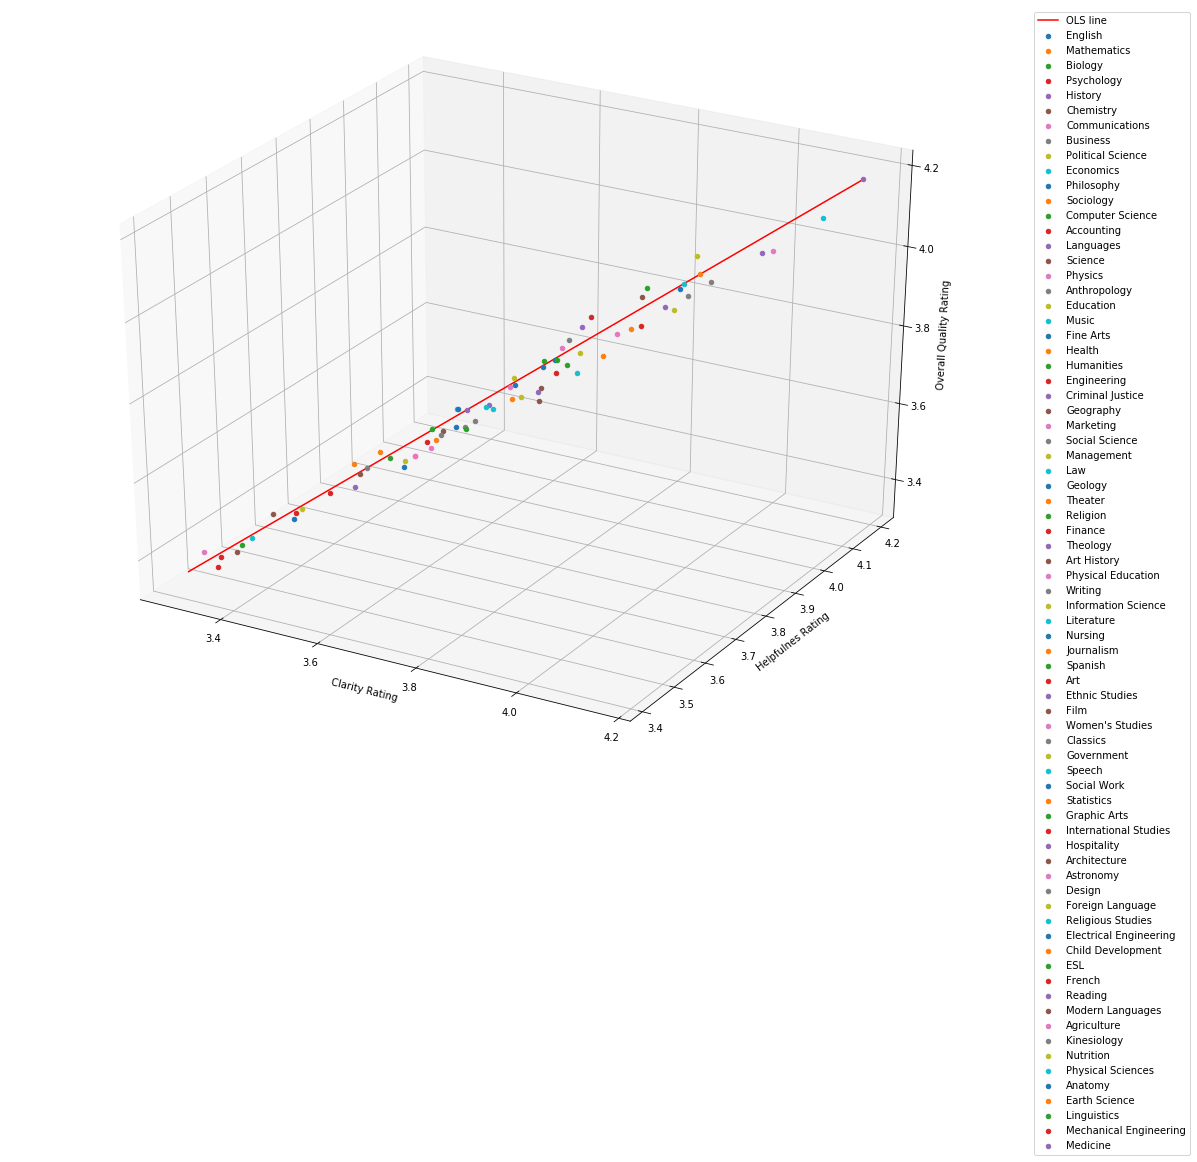

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels 
from mpl_toolkits.mplot3d import Axes3D
import scipy


# data obtained from https://matthew-brett.github.io/cfd2019/chapters/04/df_series_arrays

df = pd.read_csv('rate_my_course.csv')
df.columns = ['discipline', 'no_of_professors', 'clarity', 'helpfulness',
       'overall_quality', 'easiness']
df.reset_index(inplace = True, drop = True)
df

# multiple linear regression (overall quality ~ b0 + + easiness + no_of_professors + clarity + helpfulness)

endog = df['overall_quality']
df['intercept'] = np.ones(len(df))
exog = df[['easiness','no_of_professors', 'clarity', 'helpfulness', 'intercept']]

mul_lin_reg_mod = statsmodels.regression.linear_model.OLS(endog, exog, hasconst= True).fit()

print()
print('Multiple Linear Regression (overall quality ~ b0 + easiness + no_of_professors + clarity + helpfulness) Summary:')
print()
print(mul_lin_reg_mod.summary())


exog = df[['clarity', 'helpfulness', 'intercept']]

mul_lin_reg_mod = statsmodels.regression.linear_model.OLS(endog, exog, hasconst= True).fit()

print()
print()
print('####################################################################################################')
print()
print()
print('*Removing the Nonsignificant Predictors*')
print()
print('Multiple Linear Regression (overall quality ~ b0 + clarity + helpfulness) Summary:')
print()
print(mul_lin_reg_mod.summary())
print()

b1_clarity = mul_lin_reg_mod.params[0]
b2_helpfulness = mul_lin_reg_mod.params[1]
intercept = np.mean(df['overall_quality']) - b1_clarity*np.mean(df['clarity']) - b2_helpfulness*np.mean(df['helpfulness'])

x1_clarity = np.linspace(min(df['clarity']), max(df['clarity']))
x2_helpfulness = np.linspace(min(df['helpfulness']), max(df['helpfulness']))

y_hat = intercept + b1_clarity*x1_clarity + b2_helpfulness*x2_helpfulness
y_hat = sorted(y_hat)

fig = plt.figure(3,figsize = (18,14))
ax = fig.add_subplot(111, projection='3d')

for i in range(len(df)):
    ax.scatter(df['clarity'][i], df['helpfulness'][i], df['overall_quality'][i],  label = df['discipline'][i])
ax.plot(x1_clarity, x2_helpfulness, y_hat, color = 'red', label = 'OLS line')
plt.xlabel('Clarity Rating')
plt.ylabel('Helpfulnes Rating')
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1))
ax.set_zlabel('Overall Quality Rating')
